# _Clustering_

In [3]:
import numpy as np # Biblioteca para manejar datos vectoriales
import pandas as pd # Biblioteca para manejo de datos
import matplotlib.pyplot as plt # Visualización
import sklearn.cluster # Algoritmos de clustering

El _clustering_ o agrupamiento es la tarea de agrupar una serie de objetos de una manera que objetos del mismo grupo (_cluster_) son más similares entre sí que con los de otros grupos. Su objetivo principal es en la fase exploratoria de los datos y se clasifica dentro de los métodos no supervisados de aprendizaje de máquinas.

In [4]:
blobs = pd.read_csv("data/blobs.csv") # Importamos un csv que contiene los datos a analizar.

In [5]:
blobs.head() # Verificamos qué podemos encontrar en el conjunto de datos.

,x,y
0,-4.503286,-5.138264
1,-4.352311,-3.476970
2,-5.234153,-5.234137
3,-3.420787,-4.232565
4,-5.469474,-4.457440


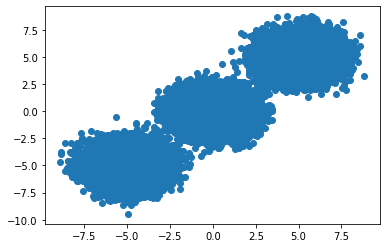

In [6]:
plt.scatter(blobs.x, blobs.y) # Exploramos la distribución que tienen nuestros datos

Intuitivamente podemos desprender que existe cierto agrupamiento de los datos. Uno de los algoritmos para realizar _clustering_ es el k-means que se encuentra implementado en la clase sklearn.cluster.KMeans. Procederemos a realizar un agrupamiento utilizando este algoritmo.

In [7]:
km = sklearn.cluster.KMeans(n_clusters=2) # Instanciamos el algoritmo de k-means
km.fit(blobs) # Ajustamos el modelo de k-means

KMeans(n_clusters=2)

In [8]:
km.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([1, 1, 1, ..., 0, 0, 0])

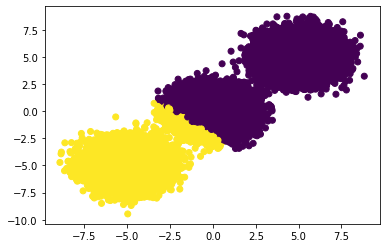

In [9]:
plt.scatter(blobs.x, blobs.y, c = km.labels_) # Verificamos gráficamente el agrupamiento

¿Qué pasó?, es correcto el número de grupos utilizado en el modelo. ¿Cómo podemos evaluar de una manera más sistemática el correcto número de grupos?.

Existe una métrica llamada inertia que mide la dispersión promedio de los grupos detectados por el método. Nosotros quisieramos que los grupos sean lo menos dispersos posibles sin generar más grupos de los que naturalmente existen en el conjunto de datos. Para poder valorar estos compromisos podríamos calcular la inertia de cada agrupamiento al variar el número de grupos a detectar.

Algo como esto:

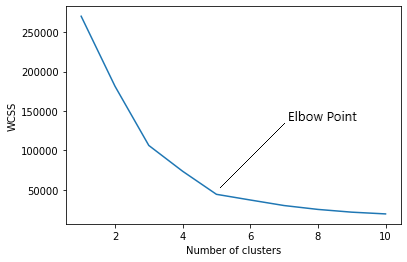

Aquí puedes encontrar la documentación de la implementación de sklearn de k-means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [10]:
# TODO: Programa un ciclo para evaluar el mejor número de clusters y grafica los resultados.

for n_clusters in range(5):
    pass

Importamos otro conjunto de datos y probamos el mismo algoritmo de agrupamiento que hicimos anteriormente.

In [9]:
moons = pd.read_csv("data/twomoons.csv")

In [10]:
moons.head()

,Unnamed: 0,x,y
0,0,1.725508,-0.043207
1,1,-0.826517,0.559084
2,2,1.964777,0.217817
3,3,1.453529,-0.398344
4,4,0.030248,0.465012


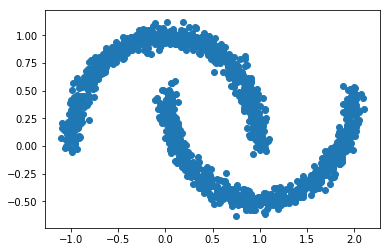

In [11]:
plt.scatter(moons.x, moons.y)

In [12]:
km = sklearn.cluster.KMeans(n_clusters=2)
km.fit(moons)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1])

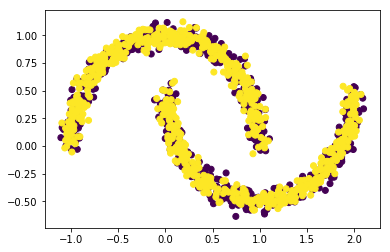

In [14]:
plt.scatter(moons.x, moons.y, c = km.labels_)

¿El agrupamiento realizado es el más correcto?. Entrena otro modelo de clustering con el algoritmo que creas es el más correcto.

Acá están listados los algoritmos de agrupamiento que contiene sklearn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

In [15]:
# TODO: Entrenamiento, ajuste y visualización de otro método de clustering.
# HINT:
ac = sklearn.cluster.AgglomerativeClustering(linkage='average')

## Datos de microarreglo

Implementa el algoritmo de agrupamiento más correcto para analizar los siguientes datos de microarreglo. Agrupa tanto por gen como por linea celular e interpreta los resultados.

P

In [16]:
microarray = pd.read_csv("data/gene_expressions.tsv", sep="\t", index_col="gene")

In [17]:
microarray.head()

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [18]:
# TODO: Entrenamiento, ajuste y visualización de un modelo de clustering para microarreglo.